In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
hcv = pd.read_csv("hcvdat0.csv")

In [ ]:
hcv.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
# missing values
hcv.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [ ]:
hcv['Sex'].value_counts()

m    377
f    238
Name: Sex, dtype: int64

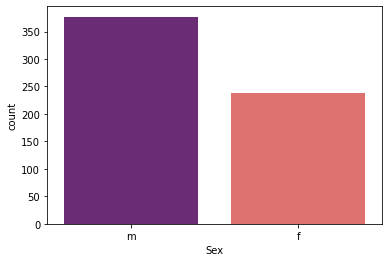

In [ ]:
sns.countplot(x = 'Sex', data = hcv, palette='magma')

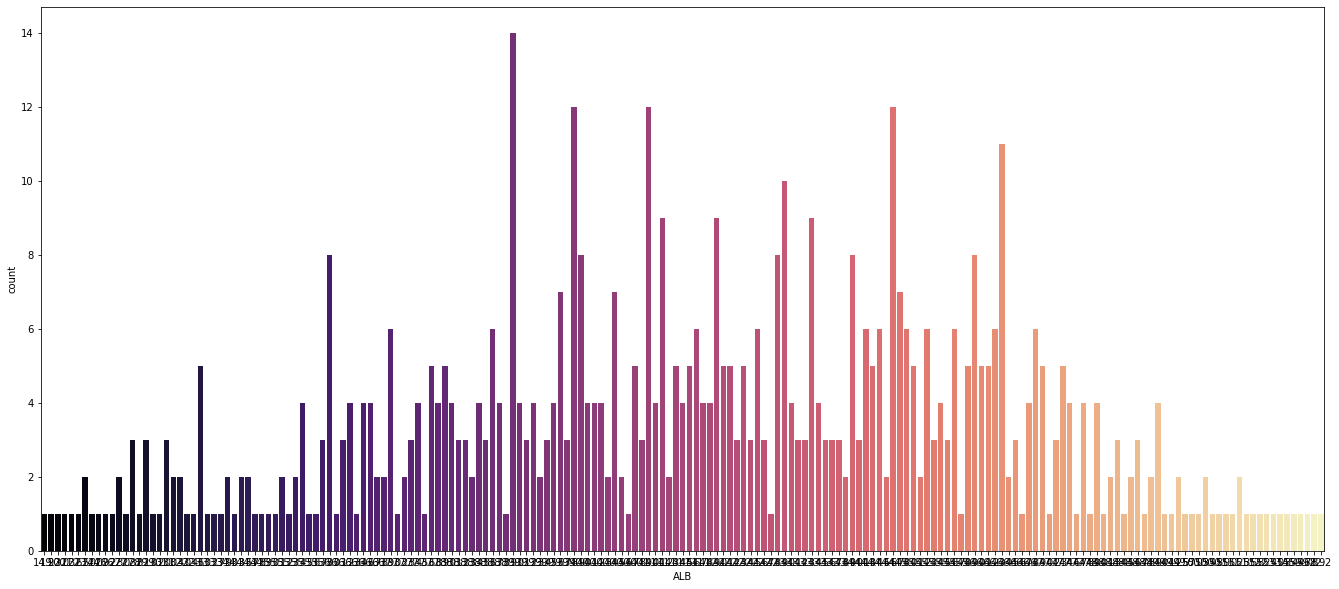

In [ ]:
plt.figure(figsize=(23,10))
sns.countplot(x = 'ALB', data = hcv, palette='magma')

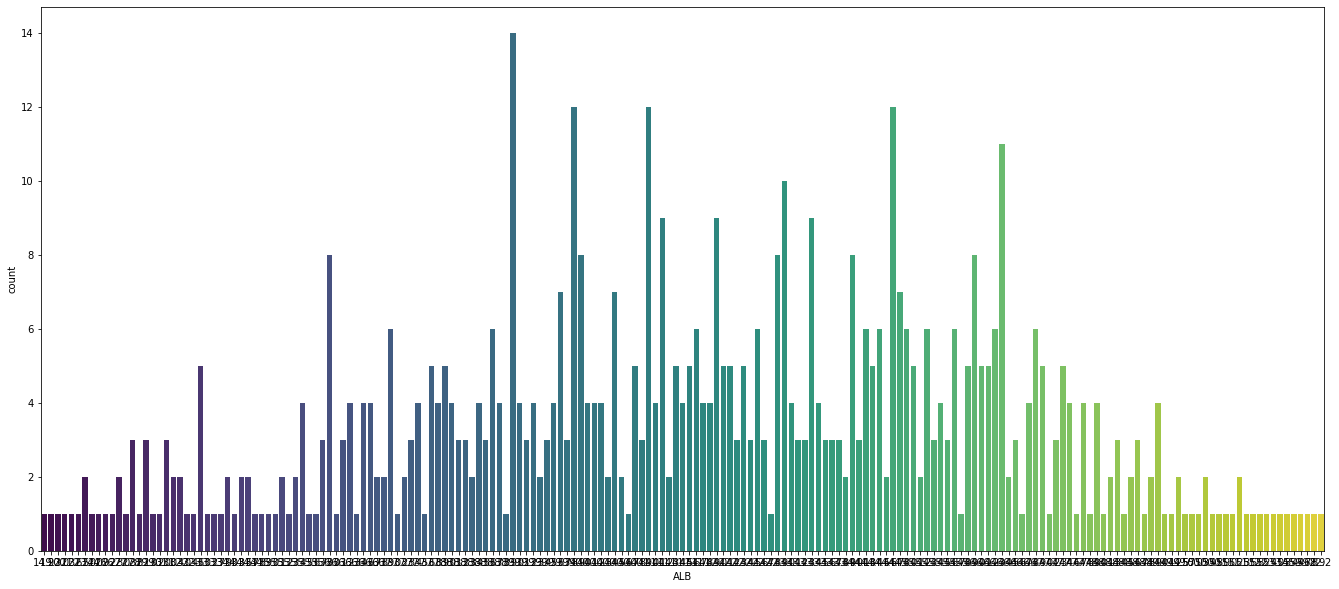

In [ ]:
plt.figure(figsize=(23,10))
sns.countplot(x = 'ALB', data = hcv ,palette='viridis')

In [ ]:
 X = hcv.iloc[:, [4]]
 X

,ALB
0,38.5
1,38.5
2,46.9
3,43.2
4,39.2
...,...
610,32.0
611,24.0
612,29.0
613,33.0


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
hcv.replace([np.inf, -np.inf], np.nan, inplace=True)
hcv.fillna(999, inplace=True)

In [ ]:
# Use elbow method to find optimum number of cluster i.e. value of 'K'
wcss = []
for i in range(1, 16):
 kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10,random_state=0)
 kmeans.fit(X)
 wcss.append(kmeans.inertia_)

In [ ]:
wcss

[935569.5321300814,
 20483.80957654724,
 9852.956933927486,
 5735.844781143538,
 4063.0372793376255,
 2649.0046586022054,
 1940.2033080737115,
 1445.9418571285541,
 1118.6159587773338,
 824.3811033170164,
 661.5842037239548,
 544.6110611267998,
 425.3258619504686,
 342.01924760015584,
 292.94497061167283]

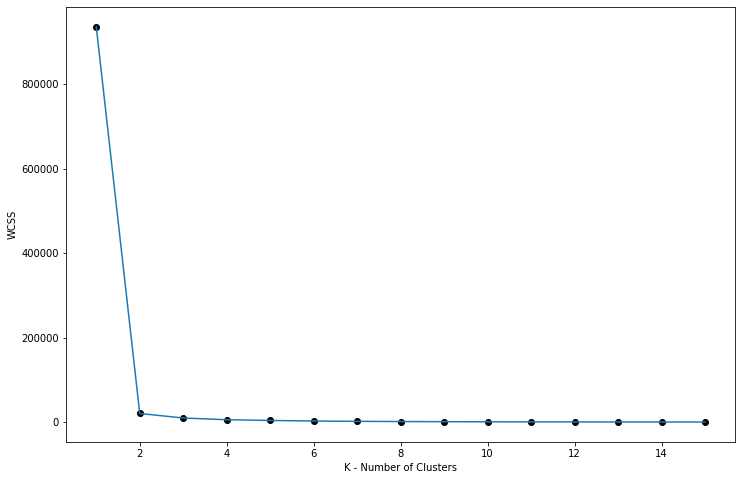

In [ ]:
 # Plot visualization b/w WCSS and Number of Clusters(K)
plt.figure(figsize=(12,8))
plt.plot(range(1,16), wcss)
# to view the points clearly we add scatter plot in addition to line
plt.scatter(range(1,16), wcss, c = 'black', marker='o')
plt.xlabel("K - Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'random', max_iter= 300, n_init=10,random_state=0)


In [ ]:
kmeans.fit(X)


KMeans(init='random', n_clusters=5, random_state=0)

In [ ]:
 y_clusters = kmeans.predict(X)
y_clusters

array([1, 1, 0, 4, 1, 4, 0, 4, 0, 4, 4, 0, 1, 1, 1, 4, 4, 4, 1, 4, 4, 0,
       4, 4, 4, 4, 4, 2, 4, 0, 4, 0, 4, 1, 4, 4, 4, 0, 0, 4, 0, 0, 2, 0,
       0, 4, 0, 0, 0, 0, 4, 4, 0, 2, 4, 4, 4, 0, 4, 1, 0, 4, 0, 0, 1, 4,
       4, 4, 0, 0, 0, 1, 0, 4, 4, 4, 4, 0, 1, 4, 4, 1, 0, 1, 4, 4, 1, 0,
       1, 0, 0, 0, 0, 4, 4, 4, 1, 4, 0, 0, 4, 1, 4, 0, 4, 0, 4, 1, 4, 4,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 4, 1, 4, 4, 4, 4, 4, 1, 4, 1,
       1, 4, 0, 4, 0, 4, 4, 0, 1, 4, 4, 4, 0, 4, 0, 4, 1, 1, 1, 4, 0, 4,
       0, 4, 0, 0, 1, 0, 0, 4, 4, 0, 4, 0, 4, 4, 0, 0, 4, 1, 0, 0, 4, 0,
       1, 4, 4, 1, 4, 0, 0, 4, 0, 0, 1, 1, 4, 4, 4, 4, 4, 0, 1, 0, 4, 0,
       4, 1, 1, 4, 4, 4, 1, 4, 1, 1, 0, 4, 4, 0, 0, 0, 4, 4, 0, 1, 0, 4,
       1, 4, 4, 0, 4, 4, 4, 1, 4, 0, 1, 4, 4, 4, 1, 0, 0, 0, 4, 0, 4, 4,
       4, 1, 4, 1, 0, 0, 2, 4, 4, 1, 1, 4, 1, 4, 4, 0, 0, 0, 4, 4, 0, 4,
       0, 4, 4, 0, 4, 4, 1, 1, 0, 4, 1, 4, 0, 4, 4, 4, 4, 0, 4, 1, 4, 1,
       4, 0, 1, 4, 1, 4, 4, 0, 1, 1, 4, 4, 4, 1, 4,

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, y_clusters)
silhouette_avg

0.5049729523348906

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter= 300, n_init=10,random_state=0)

In [ ]:
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [ ]:
y_clusters = kmeans.predict(X)
y_clusters

array([2, 2, 3, 0, 2, 0, 3, 0, 3, 0, 0, 3, 2, 2, 2, 0, 0, 0, 2, 0, 0, 3,
       0, 0, 0, 0, 0, 4, 0, 3, 0, 3, 0, 2, 0, 0, 0, 3, 3, 0, 3, 3, 4, 3,
       3, 0, 3, 3, 3, 3, 0, 0, 3, 4, 0, 0, 0, 3, 0, 2, 3, 0, 3, 3, 2, 0,
       0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 3, 2, 0, 0, 2, 3, 2, 0, 0, 2, 3,
       2, 3, 3, 3, 3, 0, 0, 0, 2, 0, 3, 3, 0, 2, 0, 3, 0, 3, 0, 2, 3, 0,
       2, 3, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2,
       2, 0, 3, 0, 3, 0, 0, 3, 2, 0, 0, 0, 3, 0, 3, 0, 2, 2, 2, 0, 3, 0,
       3, 0, 3, 3, 2, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 2, 3, 3, 0, 3,
       2, 0, 0, 2, 0, 3, 3, 0, 3, 3, 2, 2, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3,
       0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 3, 0, 0, 3, 3, 3, 0, 0, 3, 2, 3, 0,
       2, 0, 0, 3, 0, 0, 3, 2, 0, 3, 2, 0, 0, 0, 2, 3, 3, 3, 0, 3, 0, 0,
       0, 2, 0, 0, 3, 3, 4, 0, 0, 0, 2, 0, 2, 0, 0, 3, 3, 3, 0, 0, 3, 0,
       3, 0, 0, 3, 3, 0, 2, 2, 3, 0, 2, 0, 3, 0, 0, 0, 0, 3, 0, 2, 0, 2,
       0, 3, 2, 0, 2, 3, 0, 3, 0, 2, 0, 0, 0, 2, 0,

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, y_clusters)
silhouette_avg

0.5011917086389529

In [ ]:
# Centroids
kmeans.cluster_centers_

array([[ 42.44176245],
       [999.        ],
       [ 37.29122807],
       [ 47.97320261],
       [ 26.23448276]])

In [ ]:
y_clusters.astype

<function ndarray.astype>

In [ ]:
x_array = np.array(X)
x_array

array([[ 38.5],
       [ 38.5],
       [ 46.9],
       [ 43.2],
       [ 39.2],
       [ 41.6],
       [ 46.3],
       [ 42.2],
       [ 50.9],
       [ 42.4],
       [ 44.3],
       [ 46.4],
       [ 36.3],
       [ 39. ],
       [ 38.7],
       [ 41.8],
       [ 40.9],
       [ 45.2],
       [ 36.6],
       [ 42. ],
       [ 44.3],
       [ 46.7],
       [ 42.7],
       [ 43.4],
       [ 40.5],
       [ 44.8],
       [ 42.6],
       [ 29. ],
       [ 44.6],
       [ 46.8],
       [ 41.8],
       [ 46.1],
       [ 43.6],
       [ 37.5],
       [ 42.1],
       [ 44.7],
       [ 41.5],
       [ 48.7],
       [ 47.3],
       [ 44.5],
       [ 47.4],
       [ 51. ],
       [ 27.8],
       [ 46.1],
       [ 45.5],
       [ 41.7],
       [ 45.9],
       [ 48.7],
       [ 53. ],
       [ 47.8],
       [ 42.6],
       [ 42.4],
       [ 48.9],
       [ 31.4],
       [ 42.9],
       [ 44. ],
       [ 41.5],
       [ 47.9],
       [ 44.8],
       [ 38.6],
       [ 51.2],
       [ 41.9],
       [

In [ ]:
x_array.astype

<function ndarray.astype>

IndexError: ignored

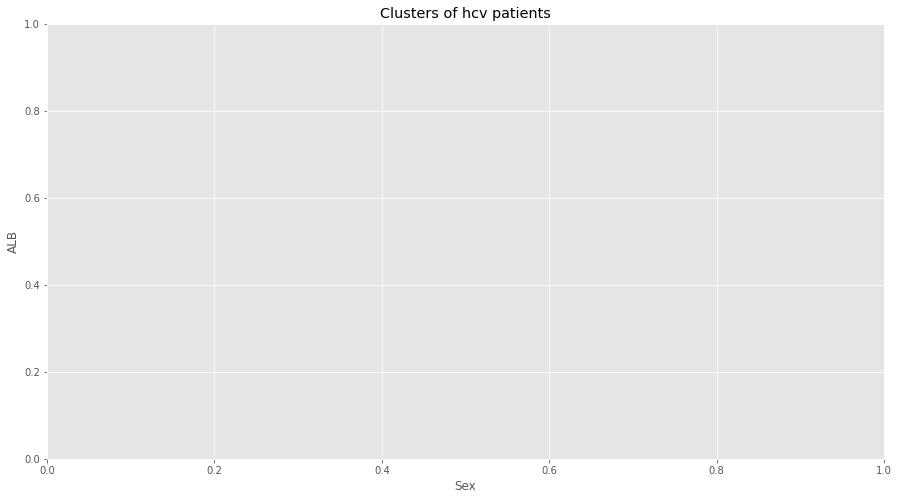

In [ ]:
# Visualization of Cluster
plt.style.use("ggplot")
plt.figure(figsize=(15,8))
plt.title('Clusters of hcv patients')
plt.xlabel('Sex')
plt.ylabel('ALB')
sns.scatterplot( x = x_array[y_clusters == 0, 0], y = x_array[y_clusters == 0, 1], label = "Cluster 1", s = 50)
sns.scatterplot( x = x_array[y_clusters == 1, 0], y = x_array[y_clusters == 1, 1], label = "Cluster 2", s = 50)
sns.scatterplot( x = x_array[y_clusters == 2, 0], y = x_array[y_clusters == 2, 1], label = "Cluster 3", s = 50)
sns.scatterplot( x = x_array[y_clusters == 3, 0], y = x_array[y_clusters == 3, 1], label = "Cluster 4", s = 50)
sns.scatterplot( x = x_array[y_clusters == 4, 0], y = x_array[y_clusters == 4, 1], label = "Cluster 5", s = 50)
#plot the centroid of the cluster inside the plot
sns.scatterplot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[: ,1],marker='x',color='black',label='Centroid',s=100)
plt.show()